In [25]:
# Bibliotecas Utilizadas
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import glob as gb
import seaborn as sns
from scipy.signal import find_peaks as fp

In [42]:
sns.set_theme(font_scale = 0.5, context = "poster")

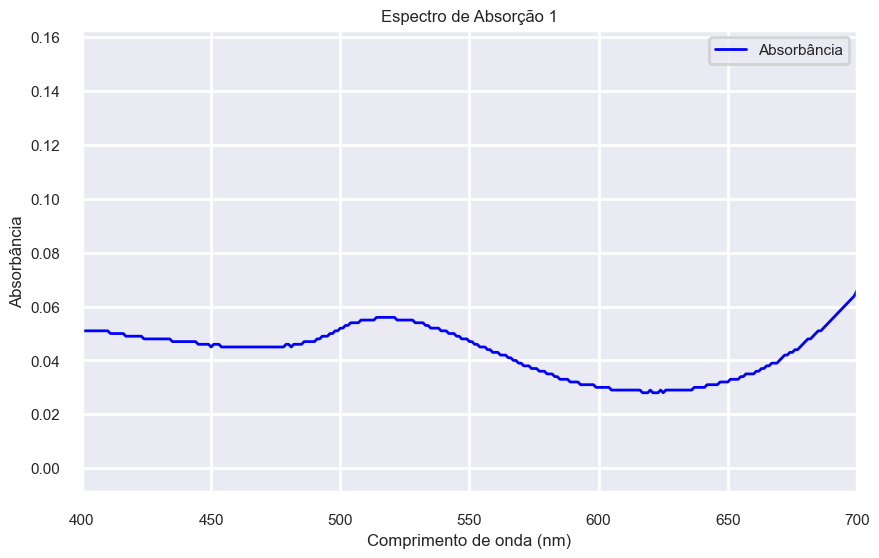

In [43]:
def plot_graficos(file_pattern, cor, largura, altura, x_min = None, x_max = None):
    """
    Cria gráficos de absorbância com base nos arquivos determinados pelo file_pattern. O usuário pode escolher as seguintes variáveis: Cor, largura, altura e intervalo
    """
    arquivos = gb.glob(file_pattern)
    indice = 1
    
    for i in arquivos:
        dados = pd.read_csv(i)
        dados.rename(columns = {dados.columns[0]: "Comprimento de onda (nm)", dados.columns[1]: "Absorbância"}, inplace = True)
        ax = dados.plot (
            title = f"Espectro de Absorção {indice}", 
            x= "Comprimento de onda (nm)",
            y= "Absorbância", 
            color = cor,
            figsize = (largura, altura),
            linewidth = 2, 
            alpha = 1,
            
        ) 
        ax.set_xlabel("Comprimento de onda (nm)")
        ax.set_ylabel("Absorbância")
        
        
        if x_min is not None or x_max is not None:
            ax.set_xlim(left=x_min, right=x_max)
            
        indice +=1
        
        
        
a = plot_graficos('C:\\Users\\julia24002\\OneDrive - ILUM ESCOLA DE CIÊNCIA\\Prática de Ciência de Dados\\padrao.txt', cor = "blue", largura = 10, altura = 6, x_min = 400, x_max = 700) 

In [31]:
def calculo_area(file_pattern, x_min = 0 , x_max = float("inf")):
    """Calcula a área sob o gráfico """
    arquivos = gb.glob(file_pattern)
    indice = 1
    for i in arquivos: 
        dados = pd.read_csv(i)
        dados.rename(columns = {dados.columns[0]: "Comprimento de onda (nm)", dados.columns[1]: "Absorbância"}, inplace = True)
        
        comprimento_de_onda = dados["Comprimento de onda (nm)"].values
        
        dados_filtrados = dados[(dados["Comprimento de onda (nm)"] >= x_min) & (dados["Comprimento de onda (nm)"] <= x_max)]
        
        comprimento_de_onda = dados_filtrados["Comprimento de onda (nm)"].values
        absorbancia = dados_filtrados["Absorbância"].values
        
   
        area = np.trapz(absorbancia, comprimento_de_onda)
        area = round(area, 4)
       
        
        print(f"A área sob a curva é: {area} para o gráfico {indice}")
        
        indice +=1
        
calculo_area('C:\\Users\\julia24002\\OneDrive - ILUM ESCOLA DE CIÊNCIA\\Prática de Ciência de Dados\\padrao.txt', x_min = 400, x_max = 700)

A área sob a curva é: 13.0095 para o gráfico 1


In [23]:
def achar_picos (file_pattern, x_min = 0 , x_max = float("inf")):
# def achar_picos (file_pattern, x_min = 0 , x_max = float("inf")):
    """Faz uma tabela com os valores máximos de absorbância e seus respectivos comprimentos de onda e plota um gráfico sinalizando esses picos"""
    arquivos = gb.glob(file_pattern)
    indice = 1
    for i in arquivos: 
        dados = pd.read_csv(i)
        dados.rename(columns = {dados.columns[0]: "Comprimento de onda (nm)", dados.columns[1]: "Absorbância"}, inplace = True)
        
        comprimento_de_onda = dados["Comprimento de onda (nm)"].values
        
#         dados_filtrados = dados[(dados["Comprimento de onda (nm)"] >= x_min) & (dados["Comprimento de onda (nm)"] <= x_max)]
        
#         comprimento_de_onda = dados_filtrados["Comprimento de onda (nm)"].values
#         absorbancia = dados_filtrados["Absorbância"].values
        
   
    h= 0.04
    prom = None
    dist = None
 
    #p, _ = fp(x = dados.Absorbância,
#               height = h,
#               prominence = prom,
#               distance = dist
#               )
#     dados_filtrados.plot ('Comprimento de onda (nm)', 'Absorbância')
#     sns.scatterplot (data =dados_filtrados.loc[p].reset_index(),
#                      x= 'Comprimento de onda (nm)',
#                      y = 'Absorbância',
#                      color = 'red', alpha = 0.5
#                     )
#     return dados_filtrados.iloc[p]
    
    p, _ = fp(x = dados.Absorbância,
              height = h,
              prominence = prom,
              distance = dist
              )
    dados.plot ('Comprimento de onda (nm)', 'Absorbância')
    sns.scatterplot (data =dados.iloc[p].reset_index(),
                     x= 'Comprimento de onda (nm)',
                     y = 'Absorbância',
                     color = 'red', alpha = 0.5
                    )
    return dados.iloc[p]



,Comprimento de onda (nm),Absorbância
3,303.0,0.072
15,315.0,0.068
40,340.0,0.060
65,365.0,0.056
76,376.0,0.055
152,452.0,0.046
179,479.0,0.046
217,517.0,0.056
483,783.0,0.155
491,791.0,0.155


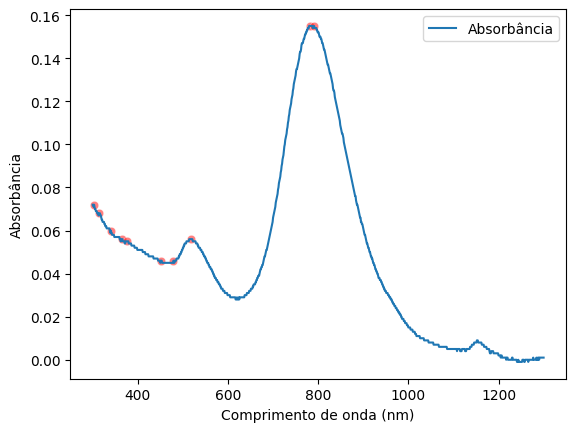

In [24]:
achar_picos('C:\\Users\\julia24002\\OneDrive - ILUM ESCOLA DE CIÊNCIA\\Prática de Ciência de Dados\\padrao.txt')

KeyError: '[3, 15, 40, 65, 76, 483, 491, 811, 822, 853, 886, 906, 919, 930, 944, 954, 962, 977, 984, 987, 989] not in index'

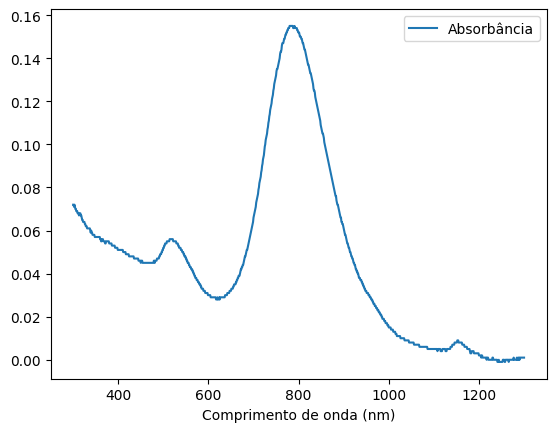

In [13]:
achar_picos('C:\\Users\\julia24002\\OneDrive - ILUM ESCOLA DE CIÊNCIA\\Prática de Ciência de Dados\\padrao.txt', x_min = 400, x_max = 700)